# Omar Hamoudeh
# Programming Exercise \#2
---

# Preamble

In [646]:
# import relevant Python libraries
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [647]:
### Your code for loading the dataset goes here ###
df = pd.read_csv('iot_telemetry_dataset.csv')

### (a)

I believe that this is an unsupervised learning task. This is because there is no ground truth label in the dataset that tells us if a person was truley near one of the devices. There is a motion detected boolean comlumn that tells us if there is motion that was sensed, but this is coming from the sensors and is not ground truth so it cannot be used as a label.

### (b)

In [648]:
print(f'There are a total of {df.shape[0]} data samples in the dataset')

There are a total of 405184 data samples in the dataset


### Code to get answers for the next 3 parts

In [649]:
macC = 0
macD = 0
macE = 0
error = 0

for sample in df.itertuples():
    if sample.device == '00:0f:00:70:91:0a': macC += 1
    elif sample.device == '1c:bf:ce:15:ec:4d': macD += 1
    elif sample.device == 'b8:27:eb:bf:9d:51': macE += 1
    else: error += 1

### (c)



In [650]:
print(f"There are {macC} samples associated with the device having MAC address 00:0f:00:70:91:0a")

There are 111815 samples associated with the device having MAC address 00:0f:00:70:91:0a



### (d)

In [651]:
print(f"There are {macD} samples associated with the device having MAC address 1c:bf:ce:15:ec:4d")

There are 105918 samples associated with the device having MAC address 1c:bf:ce:15:ec:4d


### (e)

In [652]:
print(f"There are {macE} samples associated with the device having MAC address b8:27:eb:bf:9d:51")

There are 187451 samples associated with the device having MAC address b8:27:eb:bf:9d:51


## Problem 1.2

### (a)

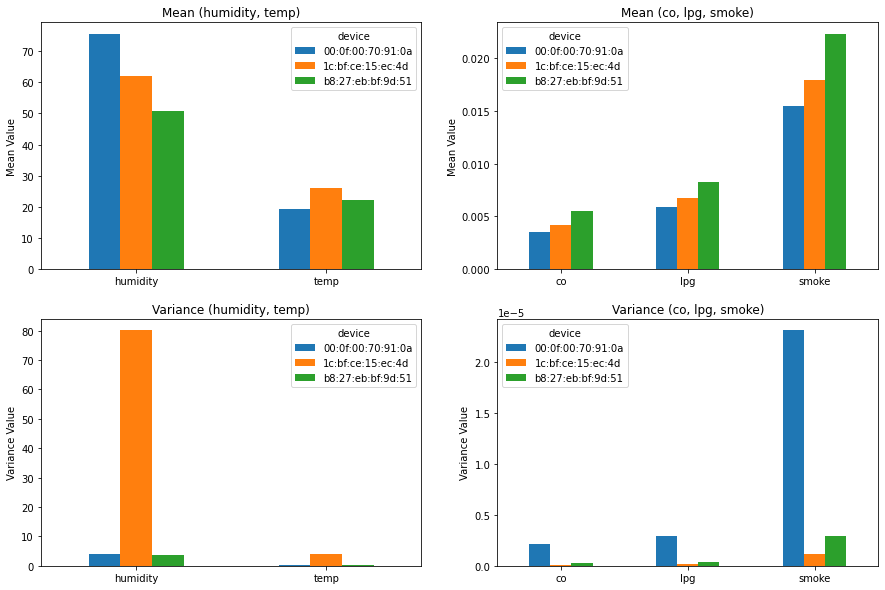

In [653]:
# Mean/Variance df's with all variables of interest grouped by device
mean = df.groupby('device').mean().drop(columns = ['ts', 'light', 'motion'])
variance = df.groupby('device').var().drop(columns = ['ts', 'light', 'motion'])

# Two seperate graphs because means/variances of humidity and temp are much larger numbers than co lpg and smoke
# Transpose them because thats how pandas.plot wants them
meanBigNumbers = mean.drop(columns = ['co', 'lpg', 'smoke']).T
meanSmallNumbers = mean.drop(columns = ['humidity', 'temp']).T
varianceBigNumbers = variance.drop(columns = ['co', 'lpg', 'smoke']).T
varianceSmallNumbers = variance.drop(columns = ['humidity', 'temp']).T

# Create subplots: 1 row, 2 columns for mean plots and 1 row, 2 columns for variance plots
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

# Plot mean
meanBigNumbers.plot.bar(ax = axes[0, 0], rot = 0, title = 'Mean (humidity, temp)')
meanSmallNumbers.plot.bar(ax = axes[0, 1], rot = 0, title = 'Mean (co, lpg, smoke)')
axes[0, 0].set_ylabel('Mean Value');
axes[0, 1].set_ylabel('Mean Value');

# Plot variance
varianceBigNumbers.plot.bar(ax = axes[1, 0], rot = 0, title = 'Variance (humidity, temp)')
varianceSmallNumbers.plot.bar(ax = axes[1, 1], rot = 0, title = 'Variance (co, lpg, smoke)')
axes[1, 0].set_ylabel('Variance Value');
axes[1, 1].set_ylabel('Variance Value');

### Mean
`humidity:` There is a signifigant difference between the mean of the humidity across the data collected from different devices.  
`temp:` These mean values are relativley close to each other.  
`co lpg smoke:` There is sort of a pattern here, where the device in green has the highest mean across these variables while the device in blue has the lowest.  

### Variance
`humidity:` The device in orange has a very high variance for this variable.  
`temp:` The device in orange has a higher variance than the other two devices.  
`co lpg smoke:` All the devices have relativley low variances for these variables except for the device in blue which has higher variances compared to the other devices.


### (b)

In [654]:
def zero_mean_and_unit_variance(df, cols_to_exclude, groupby):
    for uniqueDevice in pd.unique(df[groupby]):
        df.loc[df[groupby] == uniqueDevice, df.columns.difference(cols_to_exclude)] = df.loc[df[groupby] == uniqueDevice, df.columns.difference(cols_to_exclude)].apply(lambda x: sps.zscore(x))

zero_mean_and_unit_variance(df, ['ts', 'light', 'motion', 'device'], 'device')


### (c)

In [655]:
df = pd.get_dummies(df, columns = ['device', 'light', 'motion'], prefix = ['', 'light', 'motion'])

### (d)

In [656]:
display(df.head(20))

,ts,co,humidity,lpg,smoke,temp,_00:0f:00:70:91:0a,_1c:bf:ce:15:ec:4d,_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True
0,1.594512e+09,-1.080796,0.098428,-1.093494,-1.091262,0.871612,0,0,1,1,0,1,0
1,1.594512e+09,-0.464453,0.281223,-0.458335,-0.460394,0.524164,1,0,0,1,0,1,0
2,1.594512e+09,-1.044867,0.045488,-1.056110,-1.054139,0.664101,0,0,1,1,0,1,0
3,1.594512e+09,0.687054,1.664636,0.696251,0.694636,0.480892,0,1,0,0,1,1,0
4,1.594512e+09,-1.060347,0.045488,-1.072212,-1.070130,0.664101,0,0,1,1,0,1,0
5,1.594512e+09,0.649530,1.787613,0.659046,0.657373,0.480892,0,1,0,0,1,1,0
6,1.594512e+09,-1.044844,0.045488,-1.056086,-1.054116,0.664101,0,0,1,1,0,1,0
7,1.594512e+09,-0.398158,0.281223,-0.383563,-0.387060,0.524164,1,0,0,1,0,1,0
8,1.594512e+09,0.507422,1.787613,0.517890,0.516041,0.480892,0,1,0,0,1,1,0
9,1.594512e+09,-1.055170,0.045488,-1.066827,-1.064782,0.664101,0,0,1,1,0,1,0


### (e)

The ts variable has not been touched during preprocessing because ts stands for timestamp and there is no reason to standardize this as it is a countinous variable that tells us when each sample occurs. In other words the relative magnitude of this variable does not matter.

## Problem 1.3

In [657]:
variables = ['co', 'humidity', 'lpg', 'smoke', 'temp']

# 1. Mean of the five independent variables
df['mean'] = df[variables].mean(axis = 1)

# 2. Geometric mean of the absolute values of the five independent variables
df['geometric_mean'] = df[variables].apply(lambda row: sps.gmean(np.abs(row)), axis = 1)

# 3. Harmonic mean of the absolute values of the five independent variables
df['harmonic_mean'] = df[variables].apply(lambda row: sps.hmean(np.abs(row)), axis = 1)

# 4. Variance of the five independent variables
df['variance'] = df[variables].var(axis = 1)

# 5. Kurtosis of the five independent variables
df['kurtosis'] = df[variables].apply(lambda row: sps.kurtosis(row), axis = 1)

# 6. Skewness of the five independent variables
df['skewness'] = df[variables].apply(lambda row: sps.skew(row), axis = 1)

display(df.head(40))
df.to_csv('processed_data.csv', index = False)


,ts,co,humidity,lpg,smoke,temp,_00:0f:00:70:91:0a,_1c:bf:ce:15:ec:4d,_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True,mean,geometric_mean,harmonic_mean,variance,kurtosis,skewness
0,1.594512e+09,-1.080796,0.098428,-1.093494,-1.091262,0.871612,0,0,1,1,0,1,0,-0.459102,0.643853,0.355541,0.817556,-1.268521,0.673607
1,1.594512e+09,-0.464453,0.281223,-0.458335,-0.460394,0.524164,1,0,0,1,0,1,0,-0.115559,0.428504,0.417689,0.231204,-1.626008,0.504156
2,1.594512e+09,-1.044867,0.045488,-1.056110,-1.054139,0.664101,0,0,1,1,0,1,0,-0.489105,0.511870,0.189810,0.641326,-1.365727,0.626984
3,1.594512e+09,0.687054,1.664636,0.696251,0.694636,0.480892,0,1,0,0,1,1,0,0.844694,0.767320,0.713109,0.218515,0.083334,1.347752
4,1.594512e+09,-1.060347,0.045488,-1.072212,-1.070130,0.664101,0,0,1,1,0,1,0,-0.498620,0.516487,0.190115,0.654785,-1.374738,0.622674
5,1.594512e+09,0.649530,1.787613,0.659046,0.657373,0.480892,0,1,0,0,1,1,0,0.846891,0.752887,0.692809,0.282267,0.157954,1.420887
6,1.594512e+09,-1.044844,0.045488,-1.056086,-1.054116,0.664101,0,0,1,1,0,1,0,-0.489091,0.511863,0.189809,0.641306,-1.365713,0.626990
7,1.594512e+09,-0.398158,0.281223,-0.383563,-0.387060,0.524164,1,0,0,1,0,1,0,-0.072679,0.387291,0.379767,0.195722,-1.589427,0.520788
8,1.594512e+09,0.507422,1.787613,0.517890,0.516041,0.480892,0,1,0,0,1,1,0,0.761972,0.650613,0.589736,0.328950,0.246717,1.497492
9,1.594512e+09,-1.055170,0.045488,-1.066827,-1.064782,0.664101,0,0,1,1,0,1,0,-0.495438,0.514946,0.190014,0.650267,-1.371752,0.624102


# **2. Empirical Risk Minimization and the Law of Large Numbers**

## Problem 2.1

### (a)

In [658]:
n_values = np.arange(1, 10001)
die_rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = 10000)
empirical_averages = np.cumsum(die_rolls) / n_values

### (b)

In [659]:
expected_value = np.mean([1, 2, 3, 4, 5, 6])
discrepancies = np.abs(empirical_averages - expected_value)

### (c)



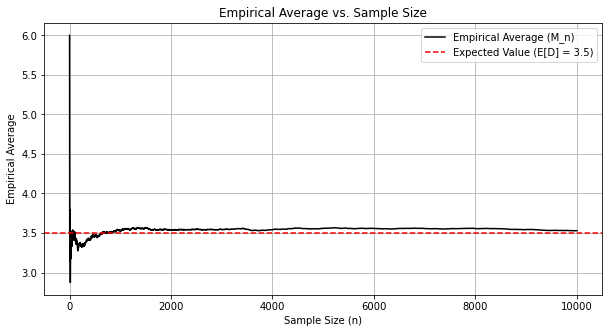

In [660]:
plt.figure(figsize = (10, 5))
plt.plot(n_values, empirical_averages, label = 'Empirical Average (M_n)', color = 'black')
plt.axhline(y = expected_value, color = 'red', linestyle = '--', label = f'Expected Value (E[D] = {expected_value})')
plt.xlabel('Sample Size (n)')
plt.ylabel('Empirical Average')
plt.title('Empirical Average vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

The empirical average converges to the expected value of 3.5 as n increases.

### (d)

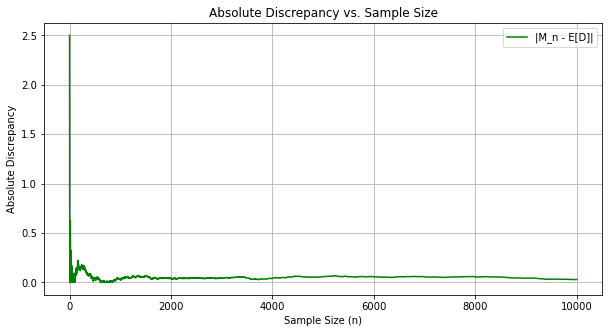

In [661]:
plt.figure(figsize = (10, 5))
plt.plot(n_values, discrepancies, label = '|M_n - E[D]|', color = 'green')
plt.xlabel('Sample Size (n)')
plt.ylabel('Absolute Discrepancy')
plt.title('Absolute Discrepancy vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

The absolute discrepency decreases as n increases, showcasing the law of large numbers which states that the empirical average of a sample will converge to its expected value as the sample size grows.

## Problem 2.2

### (a)

In [662]:
n_values = np.arange(1, 10001)
unfair_die_rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = 10000, p = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
empirical_averages = np.cumsum(unfair_die_rolls) / n_values

### (b)

In [663]:
# Computes the dot product of the two arrays which are the choices and respective probabilities
# This gives us the expected value
expected_value = np.dot([1, 2, 3, 4, 5, 6], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
discrepancies = np.abs(empirical_averages - expected_value)

### (c)

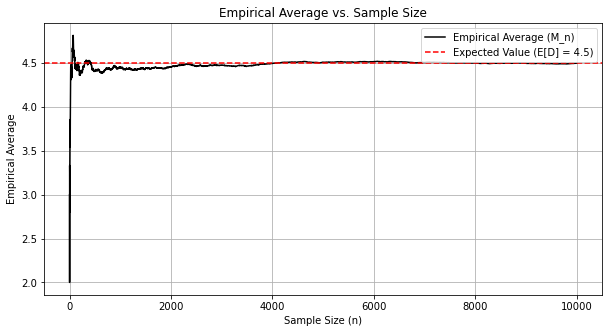

In [664]:
plt.figure(figsize = (10, 5))
plt.plot(n_values, empirical_averages, label = 'Empirical Average (M_n)', color = 'black')
plt.axhline(y = expected_value, color = 'red', linestyle = '--', label = f'Expected Value (E[D] = {expected_value})')
plt.xlabel('Sample Size (n)')
plt.ylabel('Empirical Average')
plt.title('Empirical Average vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

Similar to 2.1c, the empirical average converges to the expected value of 4.5 as n increases.

### (d)

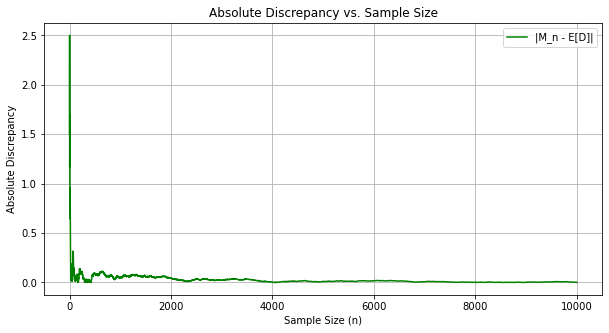

In [665]:
plt.figure(figsize = (10, 5))
plt.plot(n_values, discrepancies, label = '|M_n - E[D]|', color = 'green')
plt.xlabel('Sample Size (n)')
plt.ylabel('Absolute Discrepancy')
plt.title('Absolute Discrepancy vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()

Similar to 2.1d, the absolute discrepency decreases as n increases, showcasing the law of large numbers which states that the empirical average of a sample will converge to its expected value as the sample size grows.